# Algorithm Performance Data Analysis - Run 2

Test Parameters 

| | QuadTreeThreshold | AllowedExceedingThreshold | 
| --- | --- | --- | 
| min | 80 | 0 | 
| max | 130 | 0.010 | 
| step| 10 | 0.001 | 

In [1]:
# Import relevant modules 
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import seaborn as sns

# Load the data

## first test data 
data = pd.read_csv('IndividualCompressionData_since_test_20231102_185233.csv')

In [2]:
# Inspect the data
data

,SN,TestID,FileName,OriginalFileSize,CompressedBinSize,FileSizeDifference,CompressionRate,CompressionTime,DecompressionTime,UniquePixelCountBefore,UniquePixelCountAfter,UniquePixelCountReduction,UniquePixelCountReductionRate,MAE,MSE,PSNR,QuadtreeThreshold,AllowedExceedingThresholdFactor
0,1,test_20231102_185233,10404007.png,502730,148024,354706,0.705560,13,14,0,0,0,0.0,20.147401,2080.375429,14.949386,80,0.000
1,2,test_20231102_185233,1254659.png,342646,175949,166697,0.486499,11,7,0,0,0,0.0,12.540334,1190.506336,17.373486,80,0.000
2,3,test_20231102_185233,10188041.png,221231,25861,195370,0.883104,2,5,0,0,0,0.0,7.587872,480.758741,21.311532,80,0.000
3,4,test_20231102_185233,10287332.png,216980,25891,191089,0.880676,2,4,0,0,0,0.0,8.055694,492.245184,21.208989,80,0.000
4,5,test_20231102_185233,11610969.png,368720,93499,275221,0.746423,4,4,0,0,0,0.0,13.322535,1203.877355,17.324981,80,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5095,6,test_20231102_185641,10350842.png,212614,16,212598,0.999925,1,3,0,0,0,0.0,55.226706,11938.014080,7.361483,130,0.009
5096,7,test_20231102_185641,10863862.png,317432,3524,313908,0.988898,1,3,0,0,0,0.0,47.908412,9920.417803,8.165504,130,0.009
5097,8,test_20231102_185641,11382381.png,312486,319,312167,0.998979,1,4,0,0,0,0.0,23.355831,2900.702629,13.505772,130,0.009
5098,9,test_20231102_185641,11079715.png,443815,104494,339321,0.764555,3,4,0,0,0,0.0,18.483687,2480.511467,14.185391,130,0.009


## Analyze per Image

In [3]:
# Select an image
image_name = data['FileName'].iloc[0]  # Gets the first image name; replace with a specific name if needed
# Get all the test result for this image
singe_image_data = data[data['FileName'] == image_name] 

In [4]:
singe_image_data

,SN,TestID,FileName,OriginalFileSize,CompressedBinSize,FileSizeDifference,CompressionRate,CompressionTime,DecompressionTime,UniquePixelCountBefore,UniquePixelCountAfter,UniquePixelCountReduction,UniquePixelCountReductionRate,MAE,MSE,PSNR,QuadtreeThreshold,AllowedExceedingThresholdFactor
0,1,test_20231102_185233,10404007.png,502730,148024,354706,0.705560,13,14,0,0,0,0.0,20.147401,2080.375429,14.949386,80,0.000
10,1,test_20231102_185234,10404007.png,502730,147764,354966,0.706077,9,5,0,0,0,0.0,20.153758,2081.374885,14.947301,80,0.001
20,1,test_20231102_185234,10404007.png,502730,147241,355489,0.707117,4,5,0,0,0,0.0,20.187077,2086.871493,14.935847,80,0.002
30,1,test_20231102_185235,10404007.png,502730,146276,356454,0.709037,5,5,0,0,0,0.0,20.215143,2092.308843,14.924546,80,0.003
40,1,test_20231102_185235,10404007.png,502730,143964,358766,0.713636,4,5,0,0,0,0.0,20.303712,2107.896949,14.892310,80,0.004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5050,1,test_20231102_185639,10404007.png,502730,8286,494444,0.983518,2,3,0,0,0,0.0,28.169003,4084.778709,12.019118,130,0.005
5060,1,test_20231102_185640,10404007.png,502730,7129,495601,0.985819,1,4,0,0,0,0.0,28.619316,4246.146779,11.850854,130,0.006
5070,1,test_20231102_185640,10404007.png,502730,7129,495601,0.985819,2,3,0,0,0,0.0,28.619316,4246.146779,11.850854,130,0.007
5080,1,test_20231102_185641,10404007.png,502730,6769,495961,0.986536,1,4,0,0,0,0.0,28.663536,4260.667227,11.836027,130,0.008


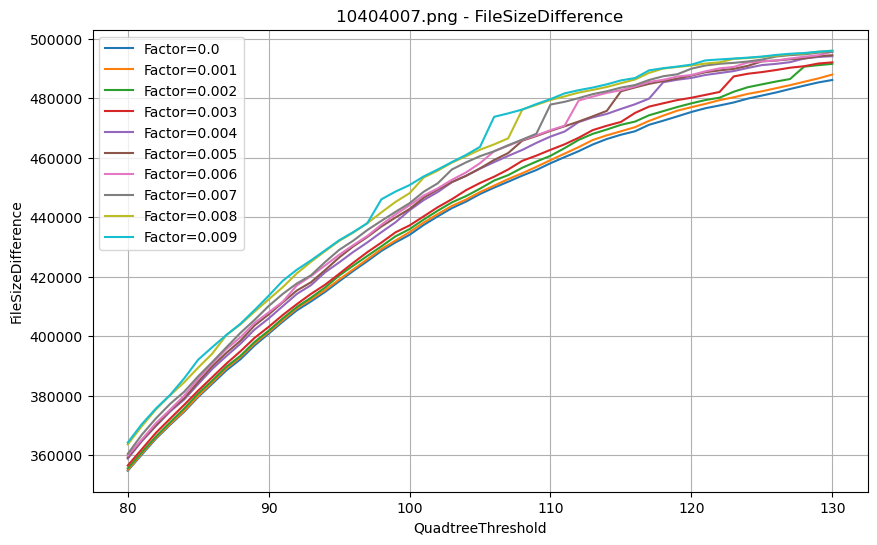

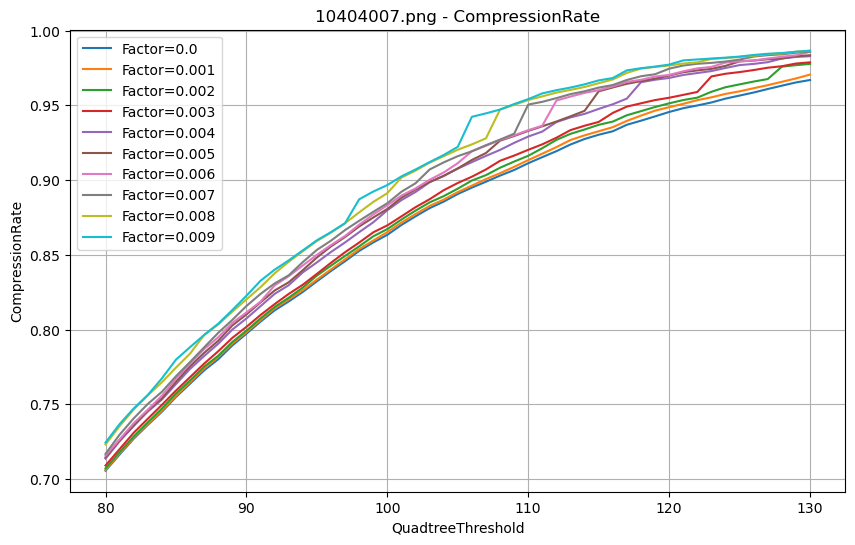

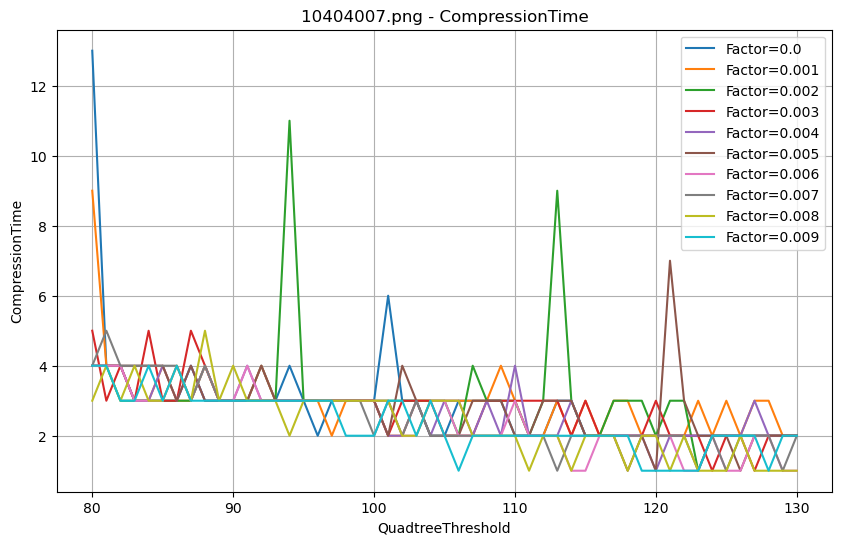

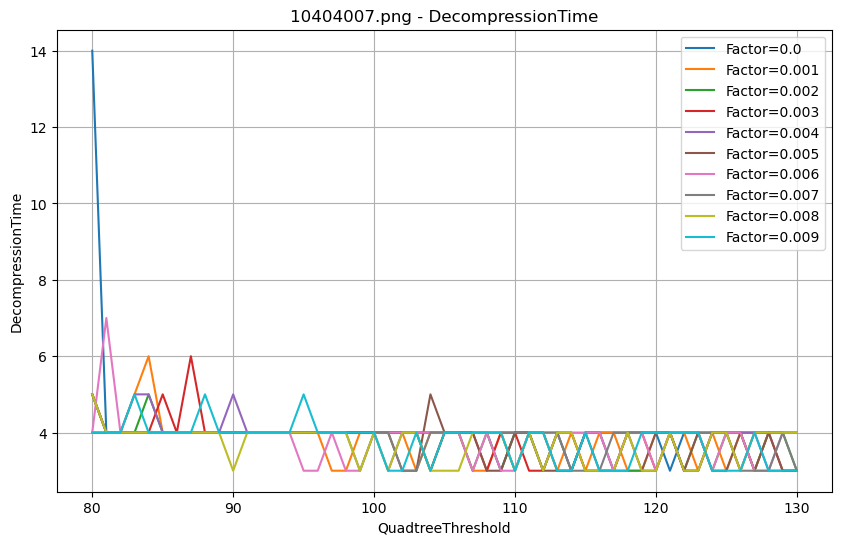

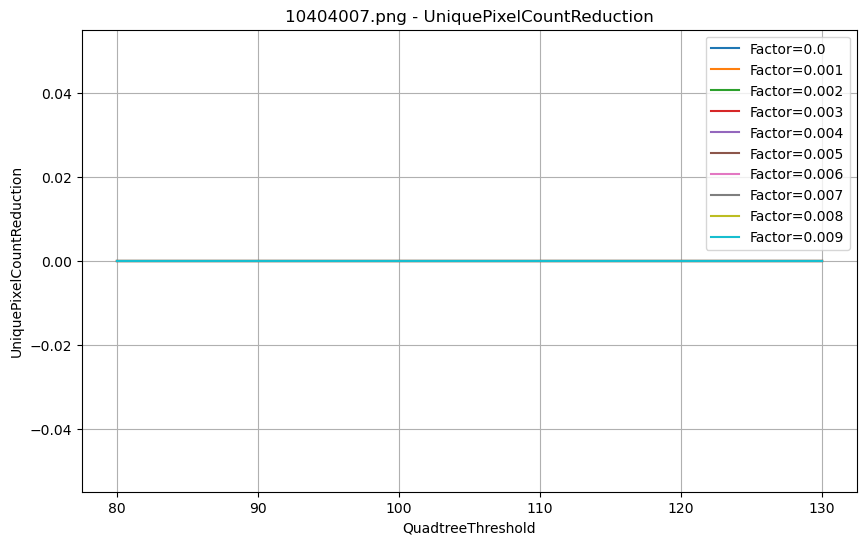

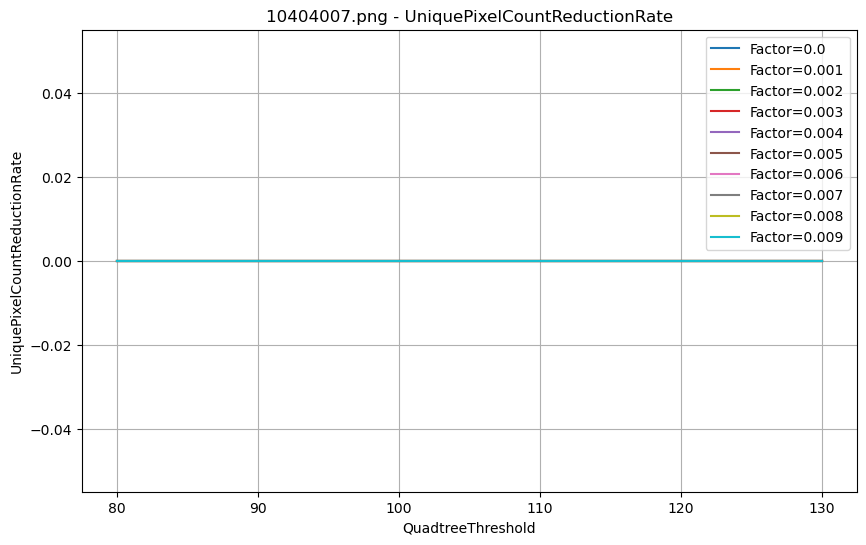

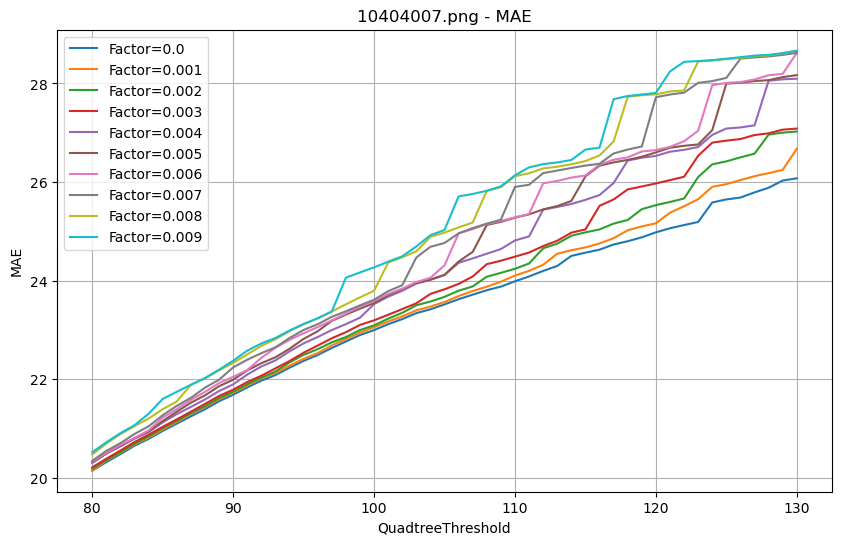

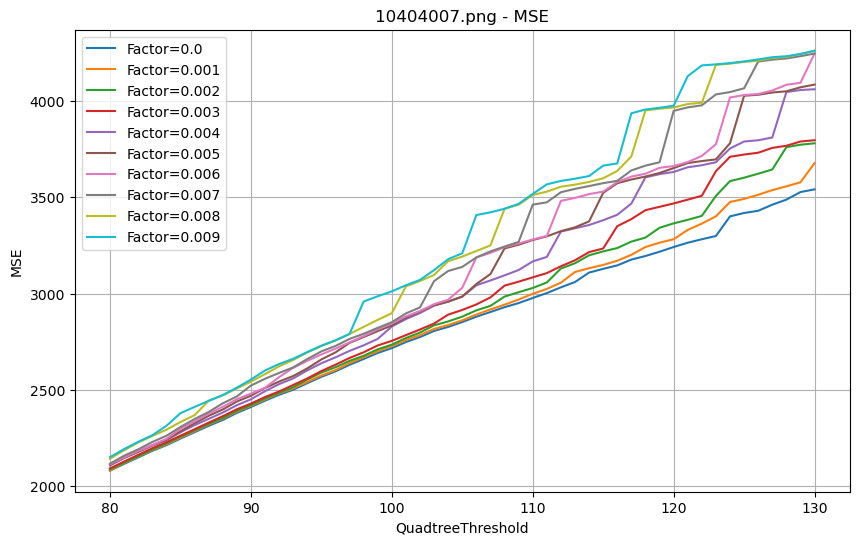

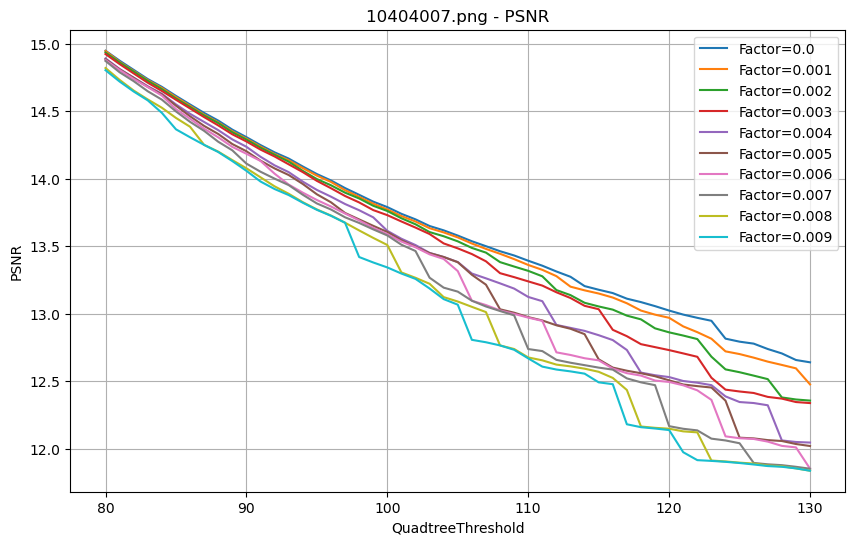

In [5]:
# List of metrics interested in
metrics = ['FileSizeDifference', 'CompressionRate', 'CompressionTime', 'DecompressionTime', 'UniquePixelCountReduction', 'UniquePixelCountReductionRate', 'MAE', 'MSE', 'PSNR']

# Create a separate plot for each metric
for metric in metrics:
    plt.figure(figsize=(10, 6))
    
    # Group by AllowedExceedingThresholdFactor and plot
    for key, sub_group in singe_image_data.groupby('AllowedExceedingThresholdFactor'):
        plt.plot(sub_group['QuadtreeThreshold'], sub_group[metric], label=f'Factor={key}')
    
    plt.title(f'{image_name} - {metric}')
    plt.xlabel('QuadtreeThreshold')
    plt.ylabel(metric)
    plt.legend()
    plt.grid(True)
    plt.show()


## Analyze per Test

In [6]:
# Group the data based on 'TestID', 'QuadtreeThreshold', 'AllowedExceedingThresholdFactor', calculate the mean for each of them 
data_grouped_by_test = data.groupby(['TestID', 'QuadtreeThreshold', 'AllowedExceedingThresholdFactor']).mean().reset_index()

/var/folders/y7/s3dq5fdd6pzgms8yt_kxxqw00000gn/T/ipykernel_19359/1924922927.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_grouped_by_test = data.groupby(['TestID', 'QuadtreeThreshold', 'AllowedExceedingThresholdFactor']).mean().reset_index()


In [7]:
data_grouped_by_test

,TestID,QuadtreeThreshold,AllowedExceedingThresholdFactor,SN,OriginalFileSize,CompressedBinSize,FileSizeDifference,CompressionRate,CompressionTime,DecompressionTime,UniquePixelCountBefore,UniquePixelCountAfter,UniquePixelCountReduction,UniquePixelCountReductionRate,MAE,MSE,PSNR
0,test_20231102_185233,80,0.000,5.5,321053.7,81832.8,239220.9,0.777228,4.6,5.6,0.0,0.0,0.0,0.0,12.415140,1048.892346,18.294494
1,test_20231102_185234,80,0.001,5.5,321053.7,81570.8,239482.9,0.778178,4.7,4.1,0.0,0.0,0.0,0.0,12.554912,1067.843954,18.191695
2,test_20231102_185234,80,0.002,5.5,321053.7,81173.1,239880.6,0.779415,2.8,4.0,0.0,0.0,0.0,0.0,12.774582,1096.917543,18.082996
3,test_20231102_185235,80,0.003,5.5,321053.7,80897.9,240155.8,0.780223,2.9,3.9,0.0,0.0,0.0,0.0,12.897310,1113.490739,18.003527
4,test_20231102_185235,80,0.004,5.5,321053.7,79638.7,241415.0,0.784203,2.8,3.9,0.0,0.0,0.0,0.0,13.219592,1160.593585,17.785477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,test_20231102_185639,130,0.005,5.5,321053.7,20545.4,300508.3,0.945385,1.5,3.7,0.0,0.0,0.0,0.0,28.428657,4824.885510,12.380221
506,test_20231102_185640,130,0.006,5.5,321053.7,20359.1,300694.6,0.945863,1.5,3.7,0.0,0.0,0.0,0.0,28.535638,4853.417408,12.340477
507,test_20231102_185640,130,0.007,5.5,321053.7,20217.6,300836.1,0.946373,1.6,3.6,0.0,0.0,0.0,0.0,28.793458,4922.027484,12.291164
508,test_20231102_185641,130,0.008,5.5,321053.7,19770.3,301283.4,0.947698,1.7,3.7,0.0,0.0,0.0,0.0,28.957187,4964.439483,12.167318


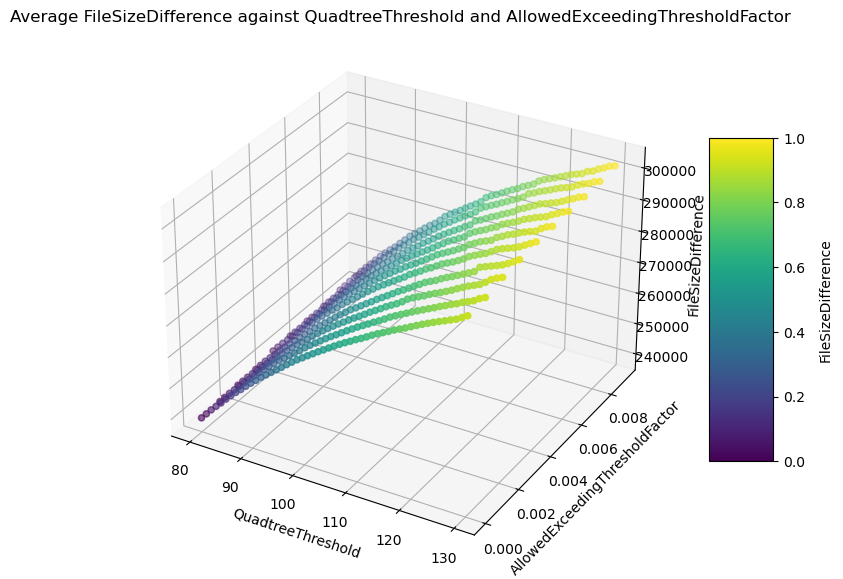

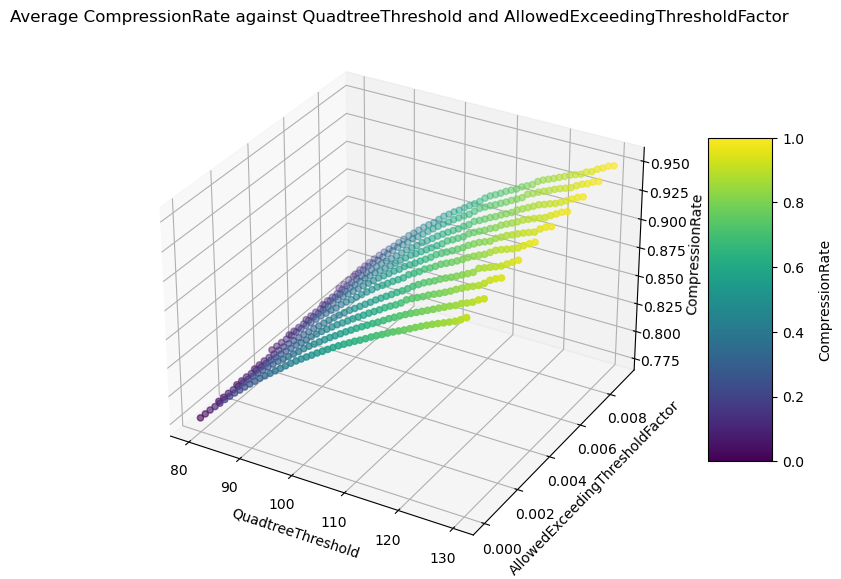

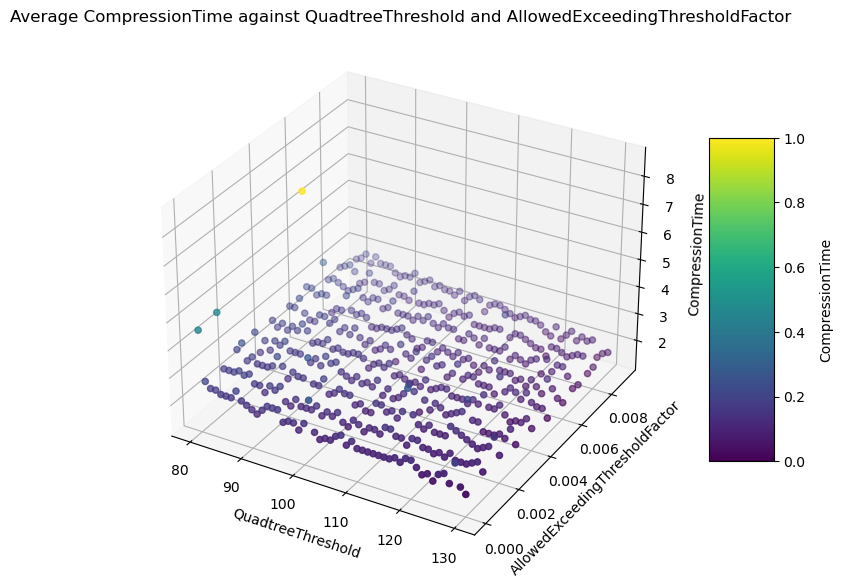

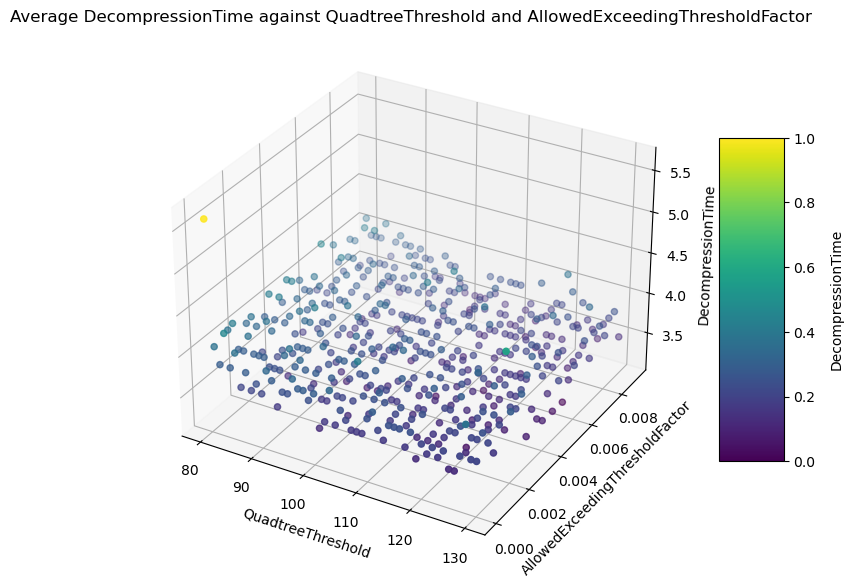

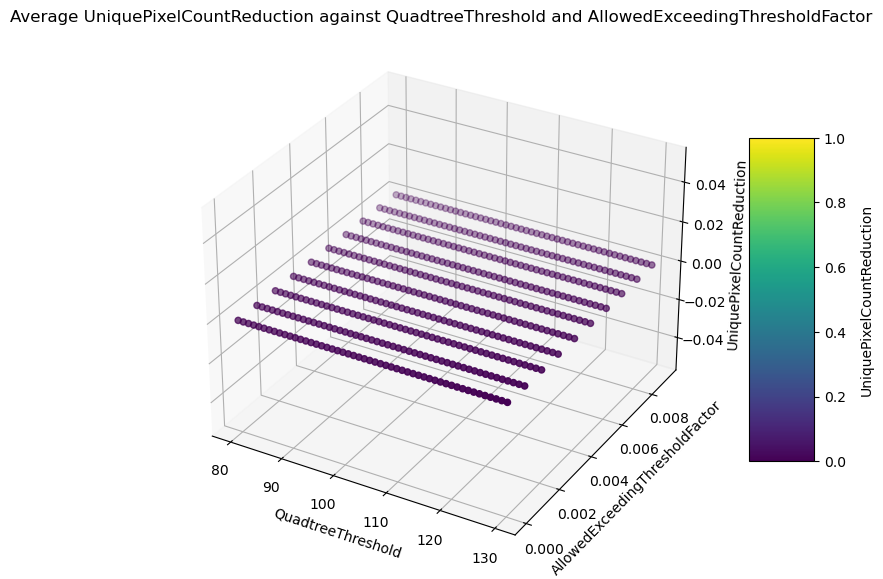

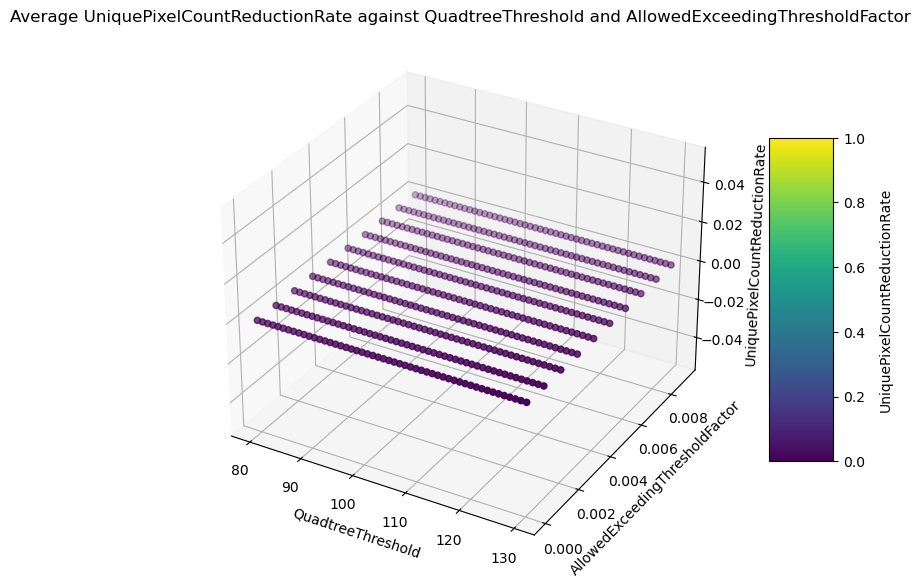

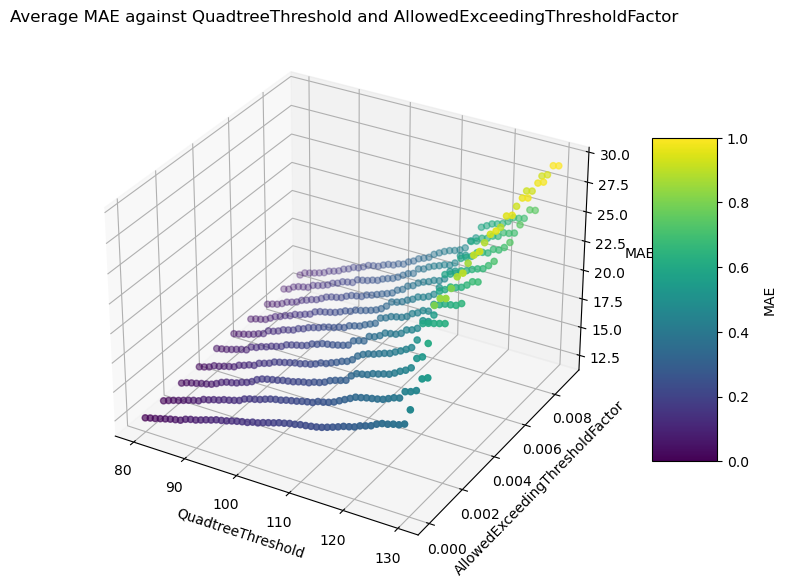

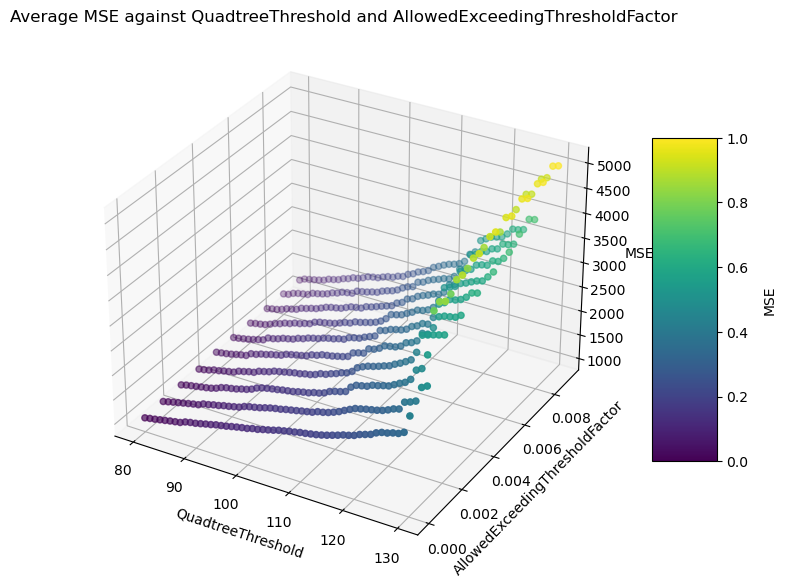

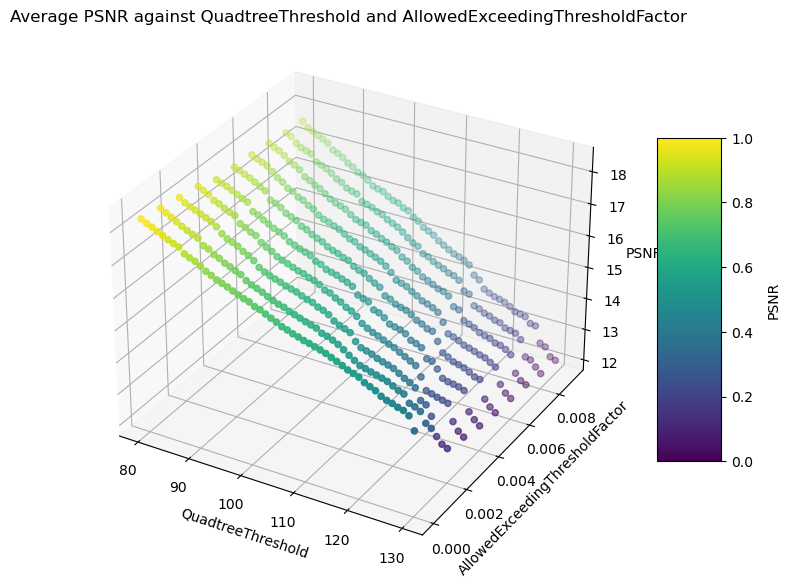

In [8]:
metrics = ['FileSizeDifference', 'CompressionRate', 'CompressionTime', 'DecompressionTime', 'UniquePixelCountReduction', 'UniquePixelCountReductionRate', 'MAE', 'MSE', 'PSNR']

for metric in metrics:
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    
    # Data for plotting
    x = data_grouped_by_test['QuadtreeThreshold']
    y = data_grouped_by_test['AllowedExceedingThresholdFactor']
    z = data_grouped_by_test[metric]
    
    # Using a colormap to represent Z values with colors
    norm = plt.Normalize(z.min(), z.max())
    colors = plt.cm.viridis(norm(z))
    sc = ax.scatter(x, y, z, c=colors)
    
    ax.set_xlabel('QuadtreeThreshold')
    ax.set_ylabel('AllowedExceedingThresholdFactor')
    ax.set_zlabel(metric)
    ax.set_title(f'Average {metric} against QuadtreeThreshold and AllowedExceedingThresholdFactor')
    
    # Adding a colorbar to the graph to indicate the scale
    cbar = fig.colorbar(sc, ax=ax, shrink=0.6, aspect=5)
    cbar.set_label(metric, labelpad=10)
    
    plt.show()


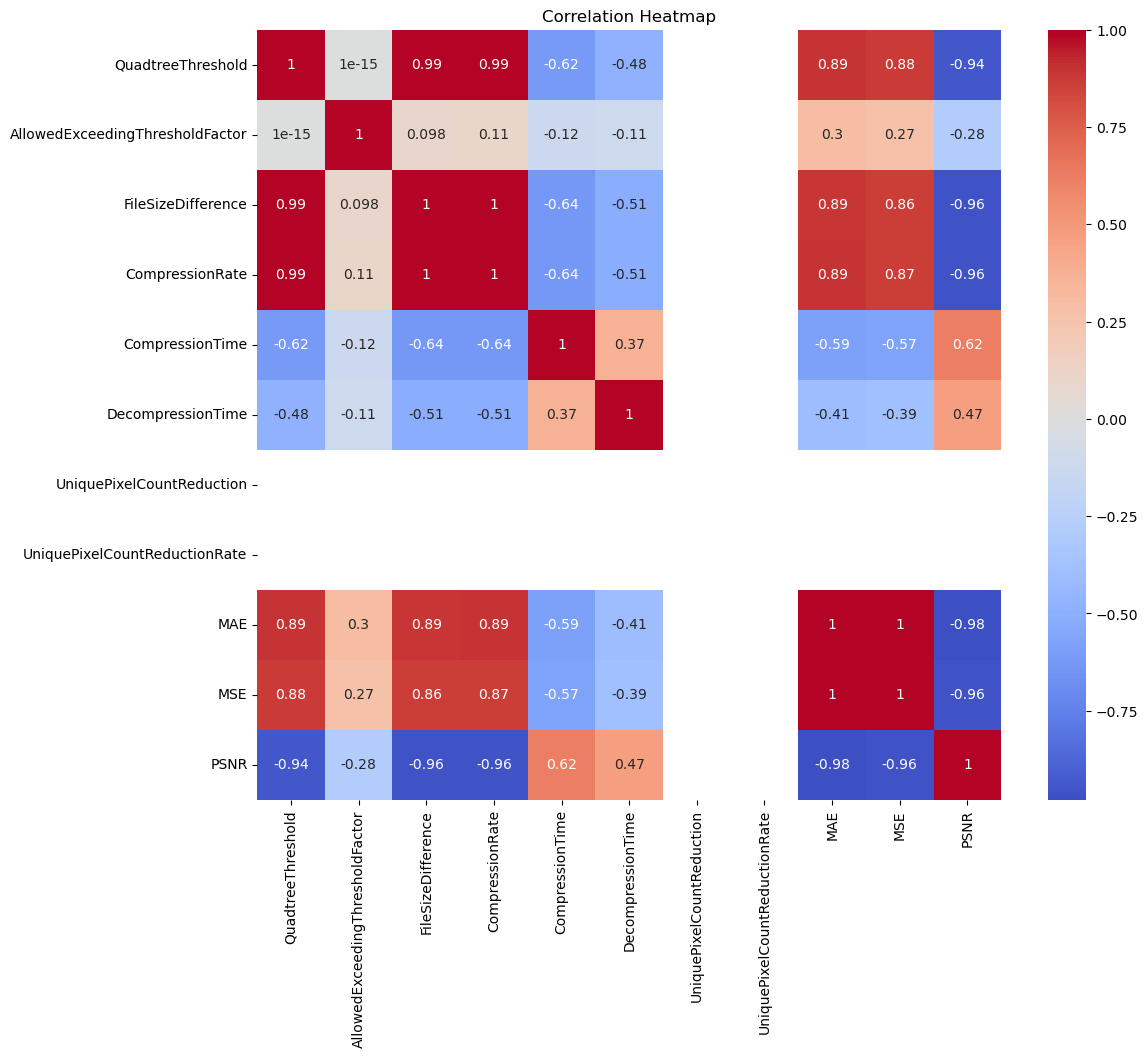

In [9]:
# Calculate the correlation matrix
correlation = data_grouped_by_test[['QuadtreeThreshold', 'AllowedExceedingThresholdFactor', 'FileSizeDifference', 'CompressionRate', 'CompressionTime', 'DecompressionTime', 'UniquePixelCountReduction', 'UniquePixelCountReductionRate', 'MAE', 'MSE', 'PSNR']].corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

## Score and Evaluation

In [10]:
def normalize(series):
    return (series - series.min()) / (series.max() - series.min())

# Normalize metrics
# data_grouped_by_test['CompressionRate'] = normalize(data_grouped_by_test['CompressionRate'])
data_grouped_by_test['CompressionTime'] = normalize(data_grouped_by_test['CompressionTime'])
data_grouped_by_test['DecompressionTime'] = normalize(data_grouped_by_test['DecompressionTime'])
data_grouped_by_test['MAE'] = normalize(data_grouped_by_test['MAE'])
data_grouped_by_test['MSE'] = normalize(data_grouped_by_test['MSE'])
data_grouped_by_test['PSNR'] = normalize(data_grouped_by_test['PSNR'])

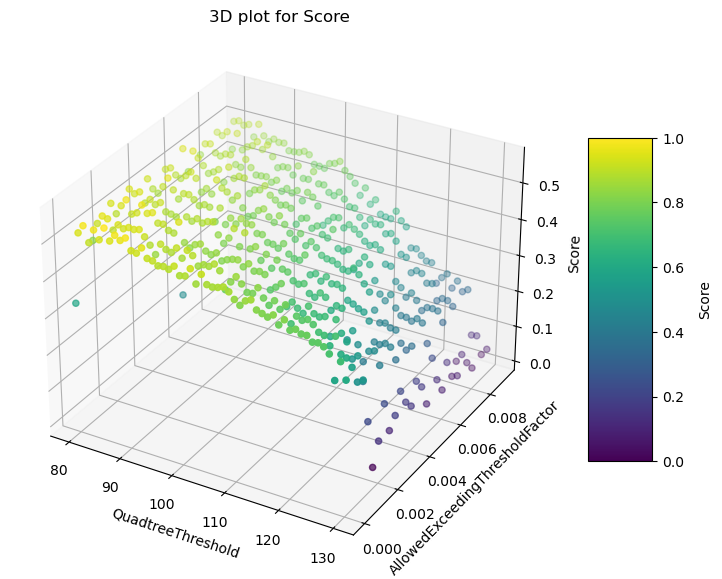

In [11]:
# Calculate LossScore
data_grouped_by_test['LossScore'] = -data_grouped_by_test['MAE'] - data_grouped_by_test['MSE'] + data_grouped_by_test['PSNR']

# Calculate the total score
data_grouped_by_test['Score'] = (5/9 * data_grouped_by_test['CompressionRate'] 
                         - 2/9 * (data_grouped_by_test['CompressionTime'] + data_grouped_by_test['DecompressionTime'])
                         + 2/9 * data_grouped_by_test['LossScore'])

# Plotting
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Data for plotting
x = data_grouped_by_test['QuadtreeThreshold']
y = data_grouped_by_test['AllowedExceedingThresholdFactor']
z = data_grouped_by_test['Score']

# Using a colormap to represent Z values (scores) with colors
norm = plt.Normalize(z.min(), z.max())
colors = plt.cm.viridis(norm(z))
sc = ax.scatter(x, y, z, c=colors)

ax.set_xlabel('QuadtreeThreshold')
ax.set_ylabel('AllowedExceedingThresholdFactor')
ax.set_zlabel('Score')
ax.set_title('3D plot for Score')

# Adding a colorbar to the graph
cbar = fig.colorbar(sc, ax=ax, shrink=0.6, aspect=5)
cbar.set_label('Score', labelpad=10)

plt.show()

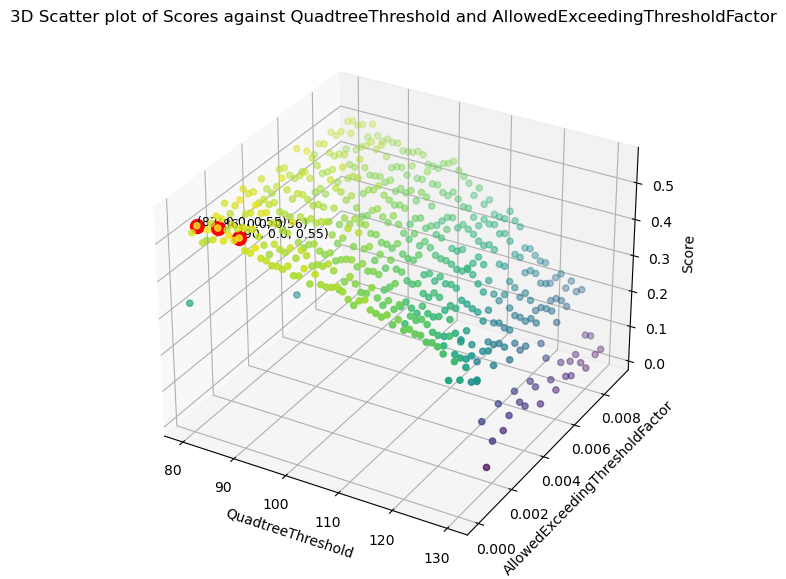

In [12]:
data_grouped_by_test = data_grouped_by_test.sort_values(by='Score', ascending=False)
top_3 = data_grouped_by_test.head(3)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for all data points
ax.scatter(data_grouped_by_test['QuadtreeThreshold'], data_grouped_by_test['AllowedExceedingThresholdFactor'], data_grouped_by_test['Score'], c=data_grouped_by_test['Score'], cmap='viridis')

# Highlighting and annotating top 3 scores
for index, row in top_3.iterrows():
    ax.scatter(row['QuadtreeThreshold'], row['AllowedExceedingThresholdFactor'], row['Score'], c='red', s=100)  # use larger size and red color
    label = '({}, {}, {:.2f})'.format(row['QuadtreeThreshold'], row['AllowedExceedingThresholdFactor'], row['Score'])
    ax.text(row['QuadtreeThreshold'], row['AllowedExceedingThresholdFactor'], row['Score'], label, fontsize=9)

ax.set_xlabel('QuadtreeThreshold')
ax.set_ylabel('AllowedExceedingThresholdFactor')
ax.set_zlabel('Score')
plt.title('3D Scatter plot of Scores against QuadtreeThreshold and AllowedExceedingThresholdFactor')
plt.show()

In [13]:
# Print out the top 3
print(top_3[['QuadtreeThreshold', 'AllowedExceedingThresholdFactor', 'Score']])


     QuadtreeThreshold  AllowedExceedingThresholdFactor     Score
60                  86                              0.0  0.556237
20                  82                              0.0  0.546406
100                 90                              0.0  0.546100
